In [2]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import cv2

In [170]:
def filter(color):
   if color < 80:
      return  255
   else:
      return 0


def seperate_numbers(image: Image.Image):

   def is_column_blank(image: Image.Image, column: int):
      for i in range(image.height):
         if image.getpixel((column, i)) != 0:
            return False
         
      return True



   def mark_column(image: Image.Image, column: int):
      for i in range(image.height):
         image.putpixel((column, i), 255)
      
   mark = False
   for i in range(image.width):

      column_blank = is_column_blank(image, i)
      if column_blank and mark:
         mark_column(image, i)
         mark = False
      
      if not column_blank:
         mark = True

In [171]:
im = Image.open("sample.jpeg")
im = im.convert("L")

def apply_filter(filter, im: Image.Image):
  for i in range(im.height):
      for j in range(im.width):
        im.putpixel((j, i),  filter(im.getpixel((j, i))))   
apply_filter(filter, im)
im = im.resize((28 * 8, 28))
# seperate_numbers(im)

156


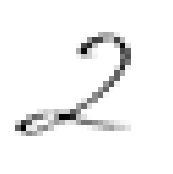

In [172]:
some_digit = np.array(im)
some_digit = some_digit.T[28* 0:28*1].T

plt.figure(figsize= (20, 2))
plt.imshow(some_digit, cmap=mpl.cm.binary,) # type: ignore
plt.axis("off")
plt.show()

In [173]:
im2 = Image.open("sample2.jpeg")
im2 = im2.convert("L")
apply_filter(filter, im2)


In [160]:
def mark_numbers(image: Image.Image):
    im = np.array(image)

    top = 0
    bottom = 0
    for i in range(image.height):
        row: np.ndarray = im[[i]]
        if row.max() > 100:
            row.fill(255)
            im[[i]] = row
            top = i
            break

    for i in range(image.height -1, -1, -1):
        row: np.ndarray = im[[i]]
        if row.max() > 100:
            row.fill(255)
            im[[i]] = row
            bottom = i
            break
    
    print(top, bottom)
    return im

144 581


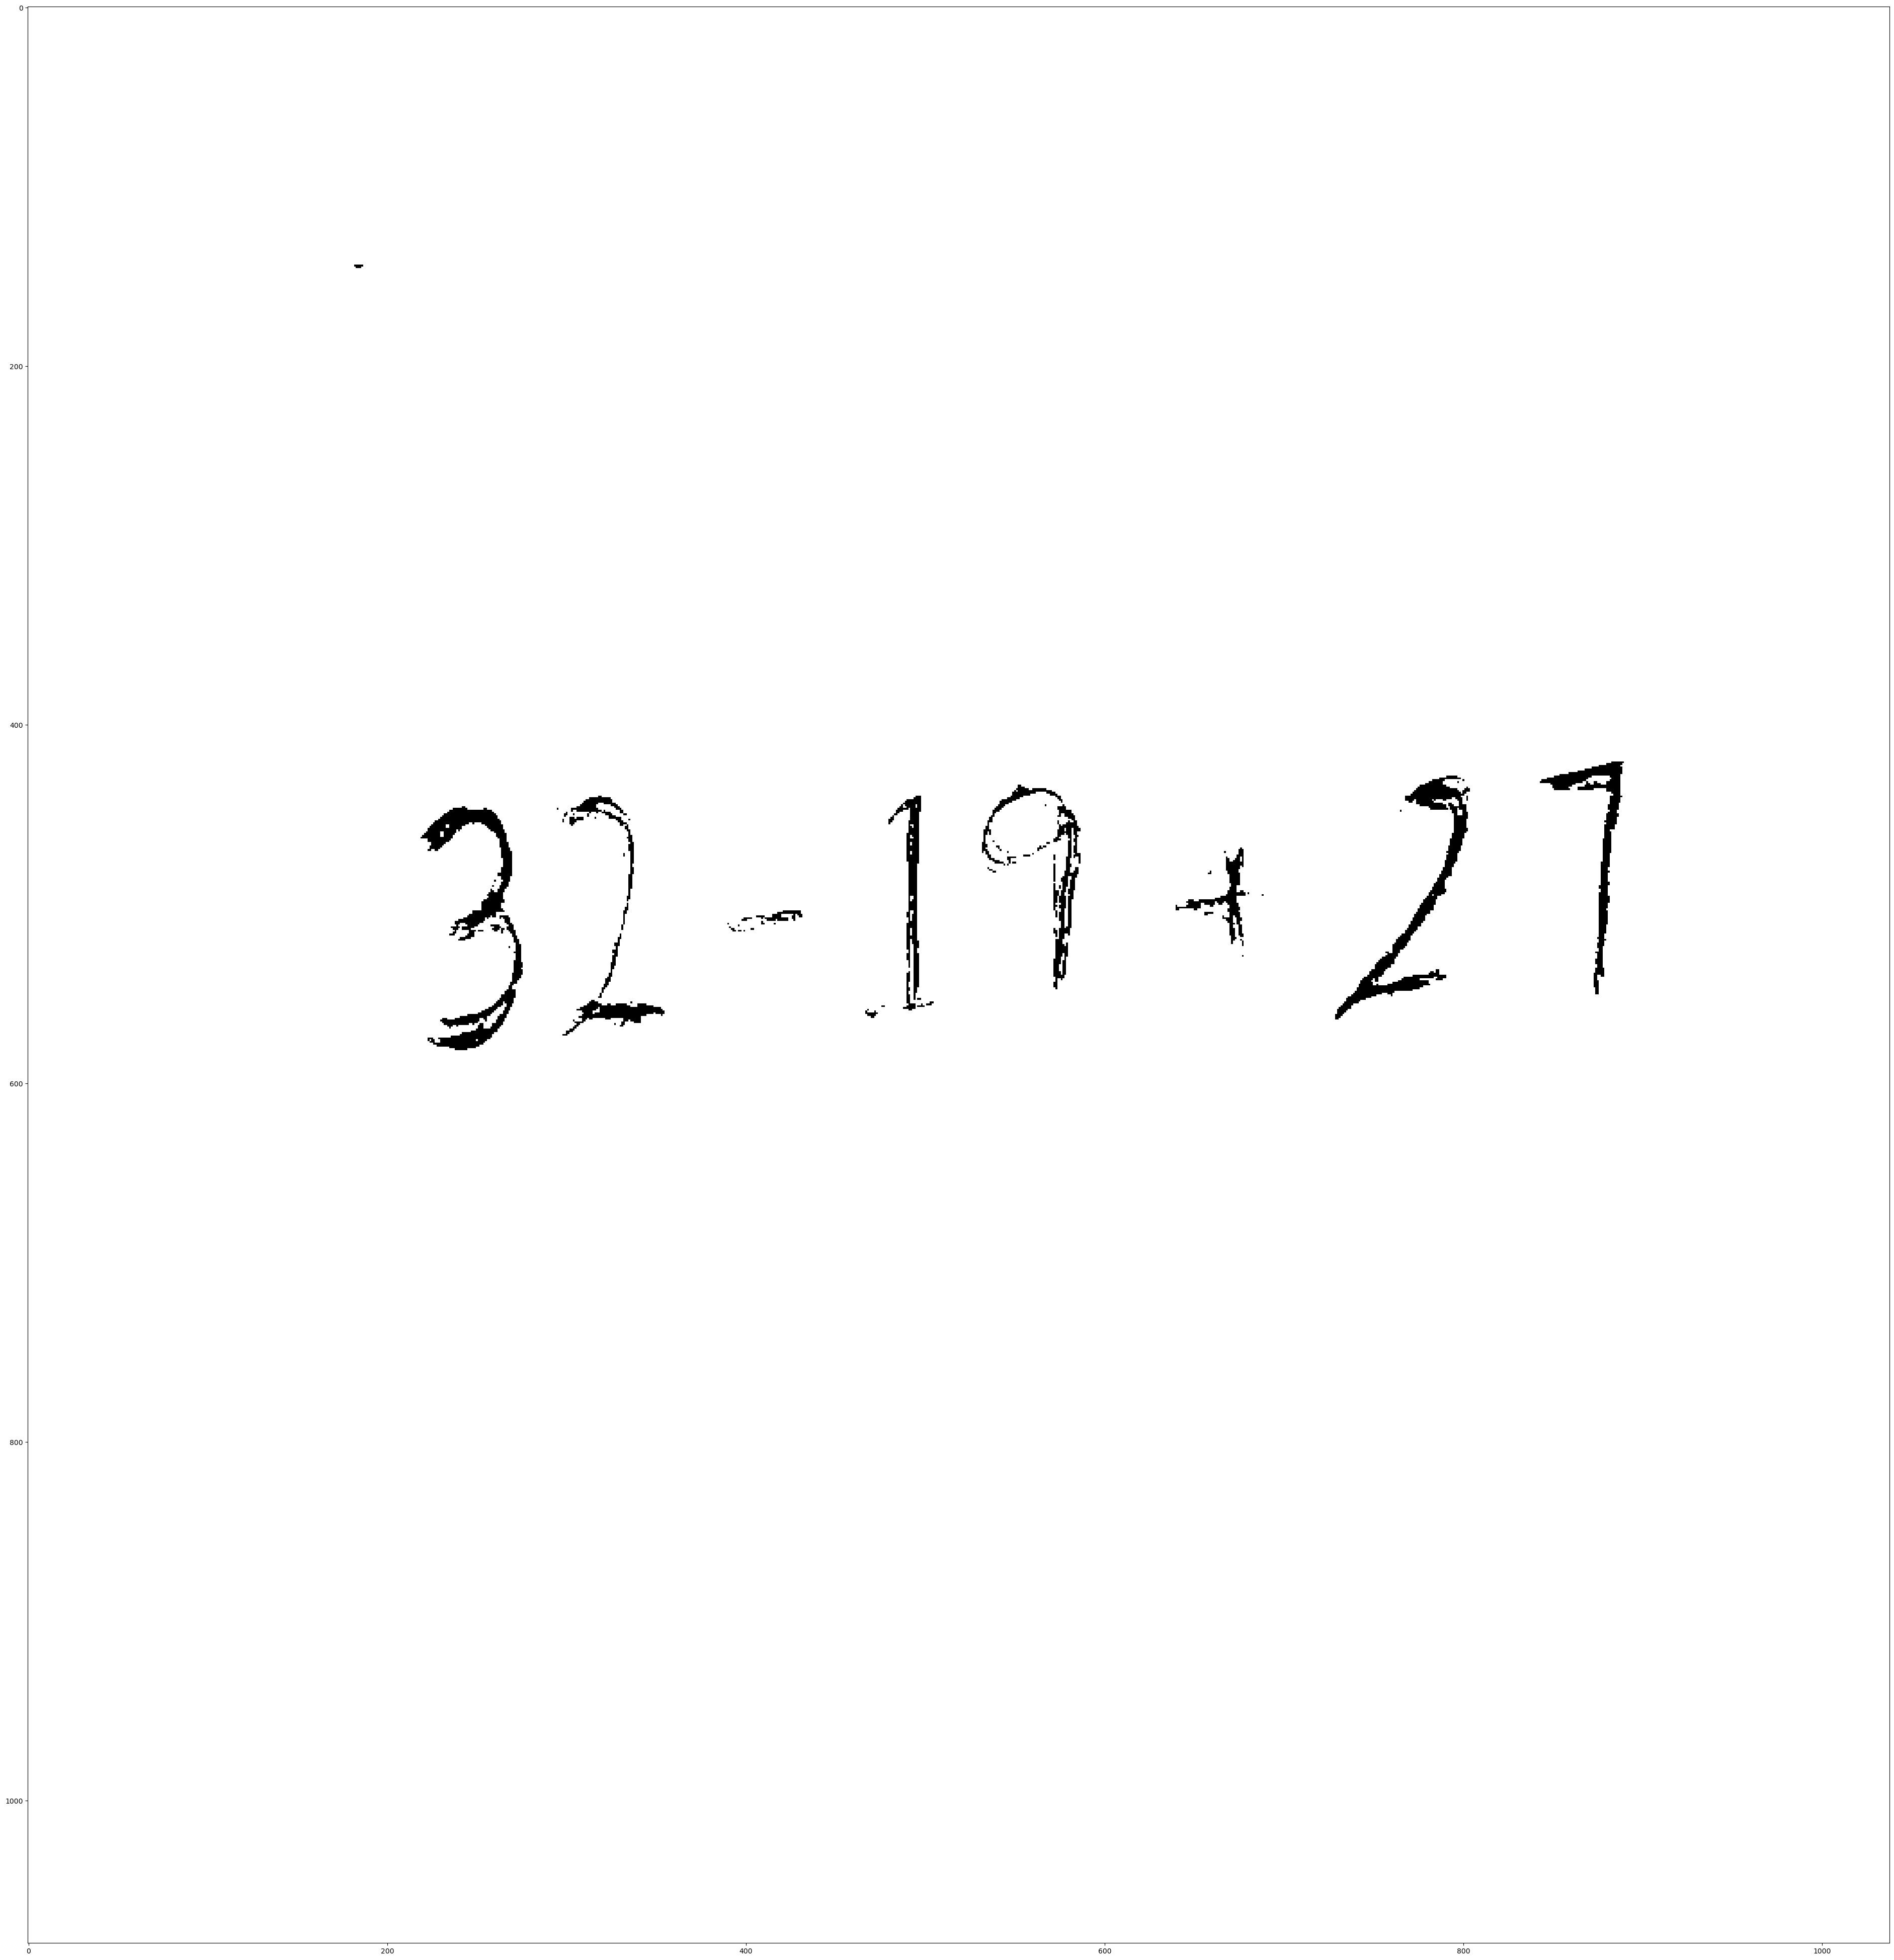

In [174]:
im2arr = mark_numbers(im2)

plt.figure(figsize=(100, 100))
plt.imshow(np.array(im2), cmap=mpl.cm.binary) #type: ignore
plt.show()



In [104]:
def predict(image, model):
    predictions = model.predict(image).reshape(10)
    predictions = list(zip(predictions, range(predictions.size)))
    return sorted(predictions, reverse=True)[0][1]

In [19]:
model = tf.keras.models.load_model("recognizer")

In [82]:
if model:
    prediction = predict(some_digit.reshape(1, 28, 28), model)
    print(prediction)


1/1 [==============================] - 0s 36ms/step
2
